# Homework w07d02 - Principal component analysis and regression

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA 

#### 1. Load the sklearn diabetes dataset. The variables are already rescaled, so you do not have to do that.

For more information on the dataset, see the original paper at 
http://web.stanford.edu/%7Ehastie/Papers/LARS/LeastAngle_2002.pdf.

In [2]:
diab = datasets.load_diabetes()

In [3]:
diab.keys()

['data', 'target']

#### 2. Obtain the principle component vectors for the dataset

In [67]:
from sklearn.decomposition import PCA

# select n_components for the number of principal components you wish to use
pca = PCA()

pca.fit(diab.data)
print("--")
print("The eigenvalues give the relative explained variance of each principal components:", pca.explained_variance_)
print("--")
print("This value as a ratio of the total variance:", pca.explained_variance_ratio_)
print("--")
print("The two main vectors describing the principal components:")
print(pca.components_[:2])
print("--")

--
('The eigenvalues give the relative explained variance of each principal components:', array([  9.10455696e-03,   3.37628560e-03,   2.72842152e-03,
         2.16171128e-03,   1.49815742e-03,   1.36361812e-03,
         1.21393769e-03,   9.81183716e-04,   1.77194367e-04,
         1.93677147e-05]))
--
('This value as a ratio of the total variance:', array([ 0.40242142,  0.14923182,  0.12059623,  0.09554764,  0.06621856,
        0.06027192,  0.05365605,  0.04336832,  0.00783199,  0.00085605]))
--
The two main vectors describing the principal components:
[[ 0.21643101  0.18696711  0.3031625   0.2717397   0.34325493  0.35186062
  -0.28243639  0.42883325  0.37861731  0.32218282]
 [ 0.04437151 -0.38654811 -0.15628061 -0.13825564  0.57302669  0.45593985
   0.50624287 -0.06818423 -0.0261893  -0.0849466 ]]
--


#### 3. Plot the explained variance ratio for each principal component 

In [69]:
pca

(442L,)

#### 4. Plot the cumulative sum of the explained variance ratio

In [28]:
tot = 100
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_ratio_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:")
print(cum_var_exp)

Cumulative explained variance:
[ 0.40242142  0.55165324  0.67224947  0.76779711  0.83401567  0.89428759
  0.94794364  0.99131196  0.99914395  1.        ]


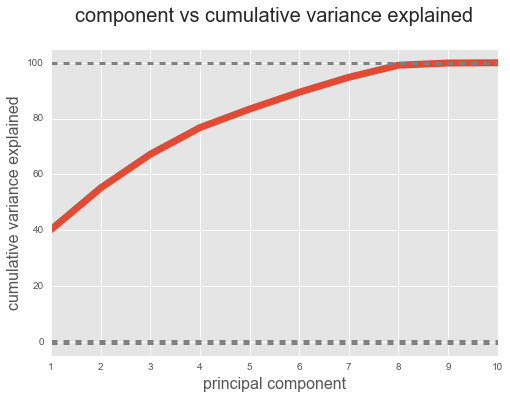

In [49]:
plt.plot(range(1,len(cum_var_exp)+1), cum_var_exp*100, lw=7)
plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')
ax = plt.gca()
ax.set_xlim([1,len(cum_var_exp)])
ax.set_ylim([-5,105])
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('principal component', fontsize=16) 
ax.set_title('component vs cumulative variance explained\n', fontsize=20)
plt.show()

#### 5. Perform a linear regression fit on the principal component vectors starting with one principal component and then inlcuding more and more principal components

In [70]:
Xpca = pca.transform(diab.data)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression(n_jobs=-1)

for n in range(pca.components_.shape[0]):
    lr.fit(Xpca[:,:n+1],diab.target)
    y_pred = lr.predict(Xpca[:,:n+1])
    print("MSE with %d principal components: %f" % (n+1,mean_squared_error(diab.target,y_pred)))

MSE with 1 principal components: 4100.973972
MSE with 2 principal components: 3878.411678
MSE with 3 principal components: 3723.544068
MSE with 4 principal components: 2963.115516
MSE with 5 principal components: 2962.699140
MSE with 6 principal components: 2918.441707
MSE with 7 principal components: 2888.582452
MSE with 8 principal components: 2882.811213
MSE with 9 principal components: 2882.075154
MSE with 10 principal components: 2859.690399


#### 6. Compare to the MSE of models based on any single or double variables from the original features

In [81]:
# With one element
lr = LinearRegression(n_jobs=-1)

for n in range(pca.components_.shape[0]):
    lr.fit(diab.data[:,n:n+1],diab.target)
    y_pred = lr.predict(Xpca[:,n:n+1])
    print("MSE with feature number %d: %f" % (n+1,mean_squared_error(diab.target,y_pred)))

MSE with feature number 1: 4289.796961
MSE with feature number 2: 6067.160334
MSE with feature number 3: 7155.028299
MSE with feature number 4: 5201.440764
MSE with feature number 5: 6123.549429
MSE with feature number 6: 6176.607677
MSE with feature number 7: 6669.156684
MSE with feature number 8: 6301.511133
MSE with feature number 9: 6099.531261
MSE with feature number 10: 5963.097689


In [87]:
# With two elements
from itertools import combinations
for n,m in combinations(range(pca.components_.shape[0]),2):
    lr.fit(diab.data[:,[n,m]],diab.target)
    y_pred = lr.predict(Xpca[:,[n,m]])
    print("MSE with feature number %d and %d: %f" % (n+1,m+1,mean_squared_error(diab.target,y_pred)))

MSE with feature number 1 and 2: 4328.978731
MSE with feature number 1 and 3: 6136.668010
MSE with feature number 1 and 4: 4645.336241
MSE with feature number 1 and 5: 4666.826586
MSE with feature number 1 and 6: 4622.687518
MSE with feature number 1 and 7: 5134.055457
MSE with feature number 1 and 8: 5140.693899
MSE with feature number 1 and 9: 5633.071727
MSE with feature number 1 and 10: 5058.713549
MSE with feature number 2 and 3: 7136.085600
MSE with feature number 2 and 4: 5067.996863
MSE with feature number 2 and 5: 6232.590489
MSE with feature number 2 and 6: 6226.529853
MSE with feature number 2 and 7: 6611.620776
MSE with feature number 2 and 8: 6174.975099
MSE with feature number 2 and 9: 5999.369247
MSE with feature number 2 and 10: 5869.638860
MSE with feature number 3 and 4: 5925.181010
MSE with feature number 3 and 5: 7072.349264
MSE with feature number 3 and 6: 7138.114649
MSE with feature number 3 and 7: 6983.155455
MSE with feature number 3 and 8: 6705.633442
MSE with

Wow, PCA with one component did better than any 1 or 2 features!

#### Optional: Use other regression methods